## Importing Libraries

In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import Algorithm from library Scikit-Learn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Setting matplotlib and warnings

plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')


## Loading Data and Preview

In [2]:
df = pd.read_csv("dataset_Iris.csv")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Exploratory Analysis to know variables and check for values NA

In [3]:
#Tipos de Variables 

df.info()

#Verificando si existen NA

df.isna().sum().sort_values()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
df.select_dtypes(include=['float64']).describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Describe Qualitative variables (type object)

df.select_dtypes(include=['object']).describe()

,Species
count,150
unique,3
top,Iris-setosa
freq,50


<AxesSubplot: xlabel='Species', ylabel='Count'>

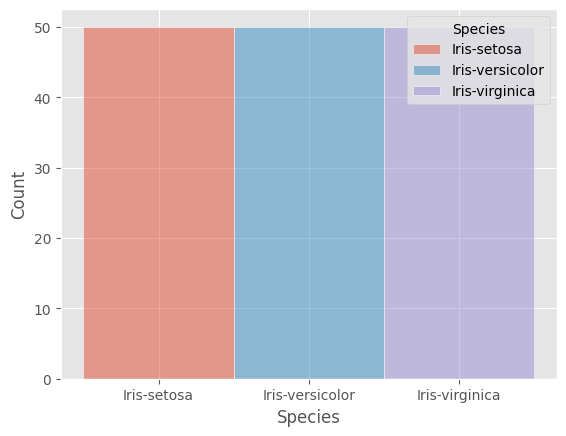

In [6]:
#Distribucion o frecuencia de la variable salidad por cada clase
sns.histplot(x= 'Species' ,hue ='Species', stat = 'count',  data = df)

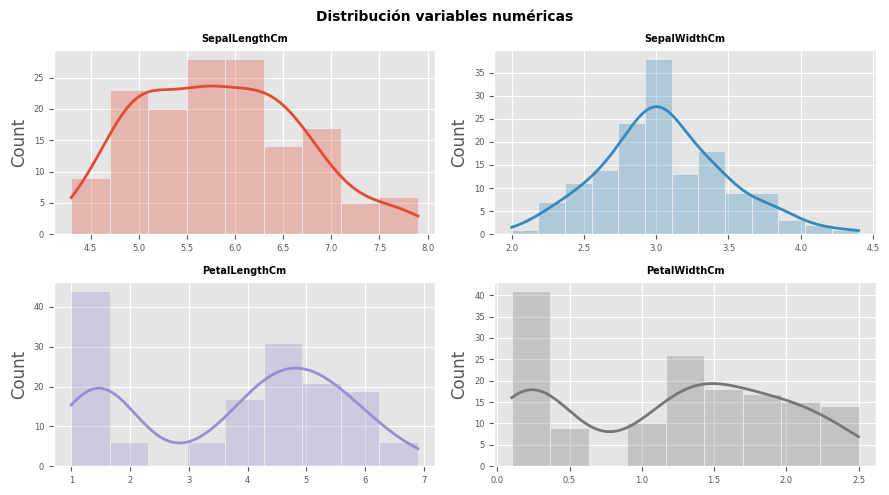

In [7]:
#Variables numericas

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

## Data processing

In [8]:
# Dividir nuestro conjunto de datos en sus atributos y etiquetas.
# (x) crear un array donde almacenamos todas las variables de entrada(Atributos), en este caso eliminamos 'species' 
# (y) La variable a clasificar o variables de salida(Etiqueta) esta la almacenamos en otro array.

x_input = df.drop('Species', axis=1).values
y_output = df['Species'].values


## Split dataset 

In [9]:
#Dividimos el dataset en datos d entranamientos y pruebas para ellos utilizamos el clasico train= 80% y test = 20%

x_train, x_test, y_train, y_test = train_test_split(x_input,y_output ,test_size= 0.2, random_state= 42,stratify= y_output)

#A traves del metodo utilizado de la libreria scikilearn para dividir el dataset realizado la divicion tanto para x como para y en un 80/20 especificado (0.2) como parte de datos para prueba & parametro de estratificacion por la variable vatiable a clasifica en este caso y semilla 42 para guardar la aleatorieda en el split.

## Create Model

In [10]:
# Espeficicamos el algorimo KNN el cual importamos de scikilearn como modelo de clasificacion con un parametro de N= 8 numero de vecino tener en cuenta que 5 es por defecto si no espefificamos este parametro, los demas parametros no estan espeficados por lo cual estan por defecto, No hay un valor ideal para K y se selecciona después de la prueba y la evaluación.

knn = KNeighborsClassifier(n_neighbors = 8)

## Training model

In [11]:

knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

## Verify Model Accuracy 

In [12]:
#Verificacion de la precision del modelo utilizando los datos de pruebas

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(x_train, y_train)))

print('Accuracy of K-NN classifier on testing set: {:.2f}'.format(knn.score(x_test, y_test)))

Accuracy of K-NN classifier on training set: 0.97
Accuracy of K-NN classifier on testing set: 0.97


## Prediction with New imput data

In [13]:
# Cargando nuevos datos de entrada 
New_input_data = pd.read_excel("iris_nuevos_datos.xlsx")

#convertir en un Array
New_x = New_input_data.values

#Vista previa de la nueva data
New_input_data.head()



,long_sepalo,anch_separo,long_petalo,anch_petalo
0,5.1,3.1,0.25,0.2
1,5.1,2.7,0.25,0.2
2,4.9,2.9,0.25,0.2
3,4.8,2.8,0.25,0.2
4,5.2,3.3,0.25,0.2


In [14]:
# Prediccion de los nuevos datos 
Prediction_y = knn.predict(New_x)

#Imprir prediccion 

print("Prediction ; {}".format(Prediction_y))


Prediction ; ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


## Optimization

In [15]:
# ya que elejimos parametros por defecto, vamos a realizar una optimizacion del modelo en especial en el numero de vecino,
# cual fue aleatorio de 8 n_neighbors, esto lo realizaremos con el metodo de la validacion cruzada de sklearn,
# la cual tiene metodos para selecional el mejor parametro.

Param_grid = {'n_neighbors': np.arange(1,50)} #parametro numero de vecino de 1:50 verificamos en las regillas cual seria el N. 
New_knn = KNeighborsClassifier() #nuevo modelo
New_knn_cv = GridSearchCV(New_knn, Param_grid, cv= 3) #Una validacion cruzada de 15 interaciones.
New_knn_cv.fit(x_input,y_output)

print('Accuracy of K-NN classifier on Best Parameter set: {:.2f}'+ str(New_knn_cv.best_params_))
print('Accuracy of K-NN classifier on Optimized set: {:.2f}'.format(New_knn_cv.best_score_))



Accuracy of K-NN classifier on Best Parameter set: {:.2f}{'n_neighbors': 4}
Accuracy of K-NN classifier on Optimized set: 0.99


In [16]:
resultados = pd.DataFrame(New_knn_cv.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000667,0.000472,0.002661,0.000469,1,{'n_neighbors': 1},0.98,0.94,0.96,0.960000,0.016330,11
1,0.000665,0.000470,0.002661,0.000470,2,{'n_neighbors': 2},0.96,0.94,0.94,0.946667,0.009428,26
2,0.001073,0.000109,0.003003,0.000016,3,{'n_neighbors': 3},0.98,0.96,0.98,0.973333,0.009428,3
3,0.000665,0.000470,0.002681,0.000487,4,{'n_neighbors': 4},0.98,1.00,0.98,0.986667,0.009428,1
4,0.000333,0.000470,0.002327,0.000471,5,{'n_neighbors': 5},0.98,0.98,0.98,0.980000,0.000000,2


<AxesSubplot: xlabel='param_n_neighbors', ylabel='mean_test_score'>

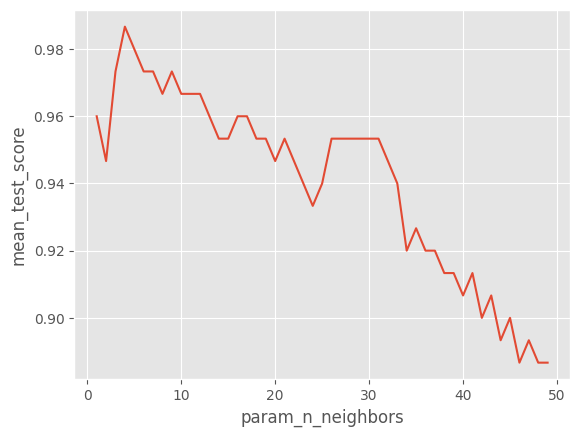

In [17]:
sns.lineplot(x = 'param_n_neighbors', y = 'mean_test_score', data = resultados)